In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

df_train=pd.read_csv('/content/drive/MyDrive/Projects/Train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Projects/Test.csv')


In [ ]:
print(df_train.isnull().sum())
print("\n")
print(df_test.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [ ]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0], inplace=True)

df_test["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)
df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0], inplace=True)

In [ ]:

df_train.loc[:, 'Item_Visibility'].replace([0],[df_train['Item_Visibility'].mean()],inplace=True)

df_test.loc[:,'Item_Visibility'].replace([0],[df_test['Item_Visibility'].mean()],inplace=True)

In [ ]:
df_train.drop(['Item_Identifier'],axis=1,inplace=True)
df_train.drop(['Outlet_Identifier'],axis=1,inplace=True)
df_train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True) 

df_test.drop(['Item_Identifier'],axis=1,inplace=True)
df_test.drop(['Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Outlet_Establishment_Year'],axis=1,inplace=True) 

In [ ]:
#train_set
cat_col=[]
for x in df_train.dtypes.index:
  if df_train.dtypes[x]=='object':
    cat_col.append(x)

for col in cat_col:
  print(col)
  print(df_train[col].value_counts())
  print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [ ]:
#test_set
cat_col=[]
for x in df_test.dtypes.index:
  if df_test.dtypes[x]=='object':
    cat_col.append(x)

for col in cat_col:
  print(col)
  print(df_test[col].value_counts())
  print()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Outlet_Size
Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64



In [ ]:

df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df_test['Item_Fat_Content'].value_counts()


Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

**Visualization**

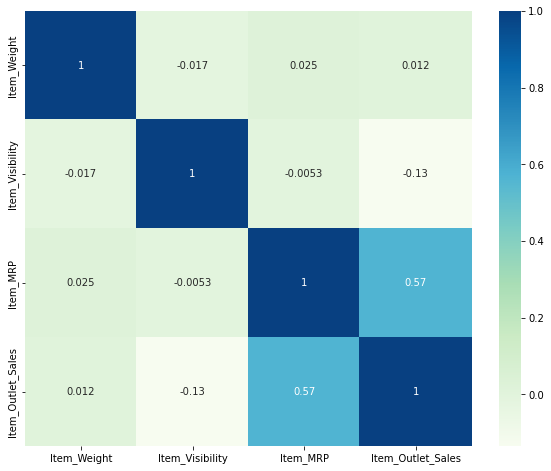

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),cmap='GnBu', annot=True)
plt.show()

**Visualization on Numerical features**

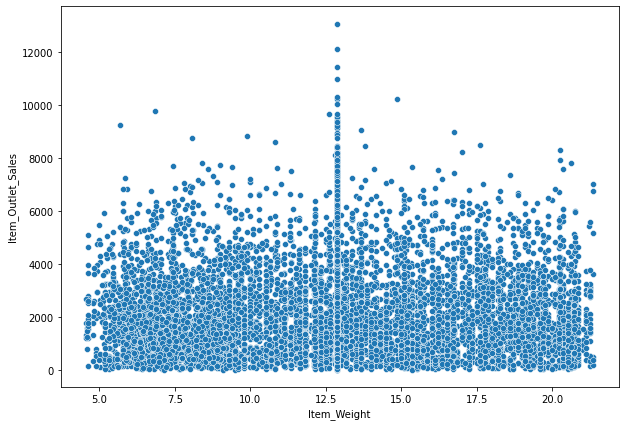

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df_train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


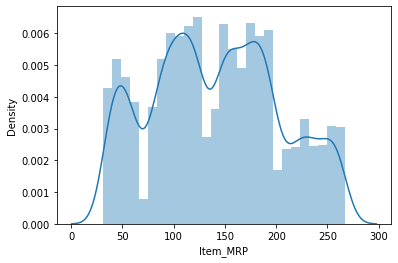

In [ ]:
#sns.displot(x=df_train.Item_MRP,kde=True)
sns.distplot(df_train['Item_MRP'])
plt.show()

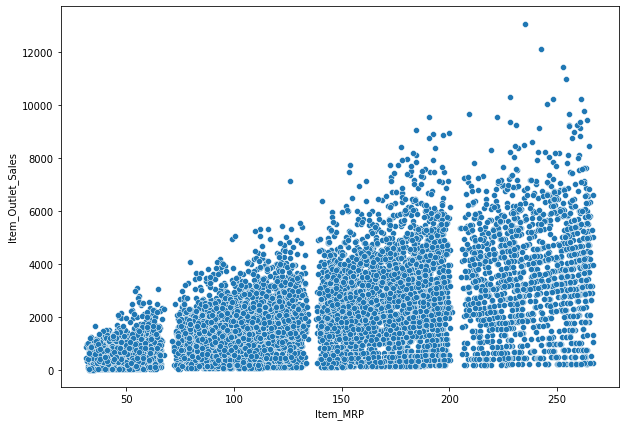

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df_train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


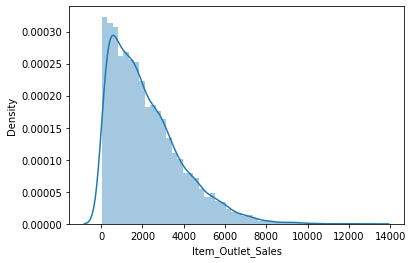

In [ ]:
sns.distplot(df_train['Item_Outlet_Sales'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


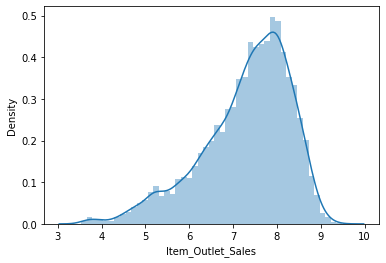

In [ ]:
df_train['Item_Outlet_Sales']=np.log(1+df_train['Item_Outlet_Sales'])
sns.distplot(df_train['Item_Outlet_Sales'])

**Visualization on Categorical features**

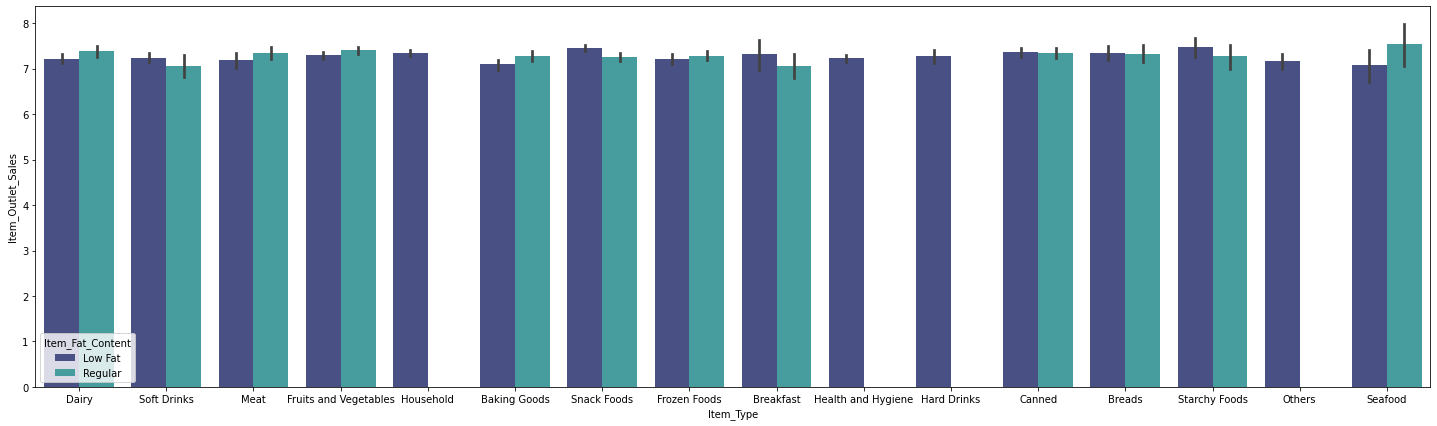

In [ ]:
plt.figure(figsize=(25,7))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=df_train, palette='mako')
plt.show()

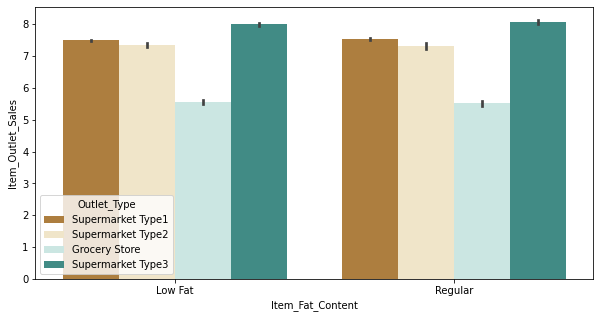

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=df_train,hue='Outlet_Type',palette='BrBG')
plt.show()

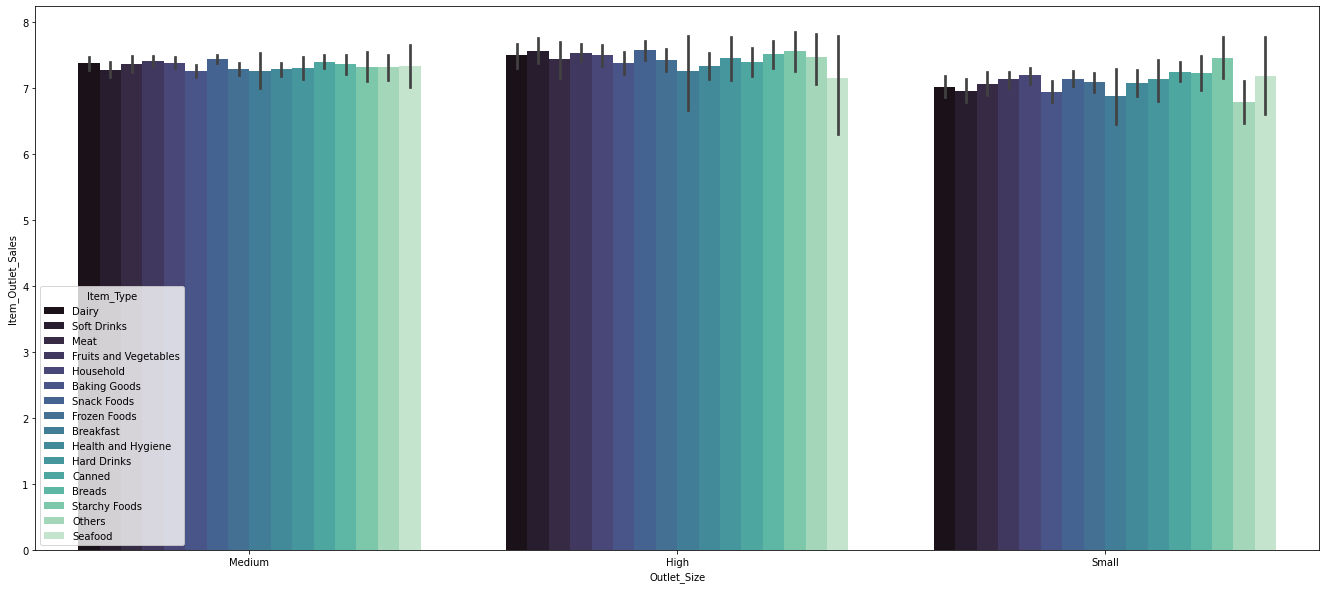

In [ ]:
plt.figure(figsize=(23,10))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Item_Type',data=df_train, palette='mako')
plt.show()

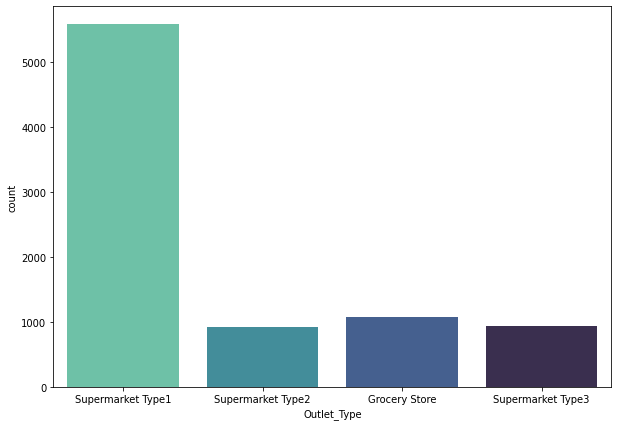

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outlet_Type',data=df_train,palette='mako_r')
plt.show()

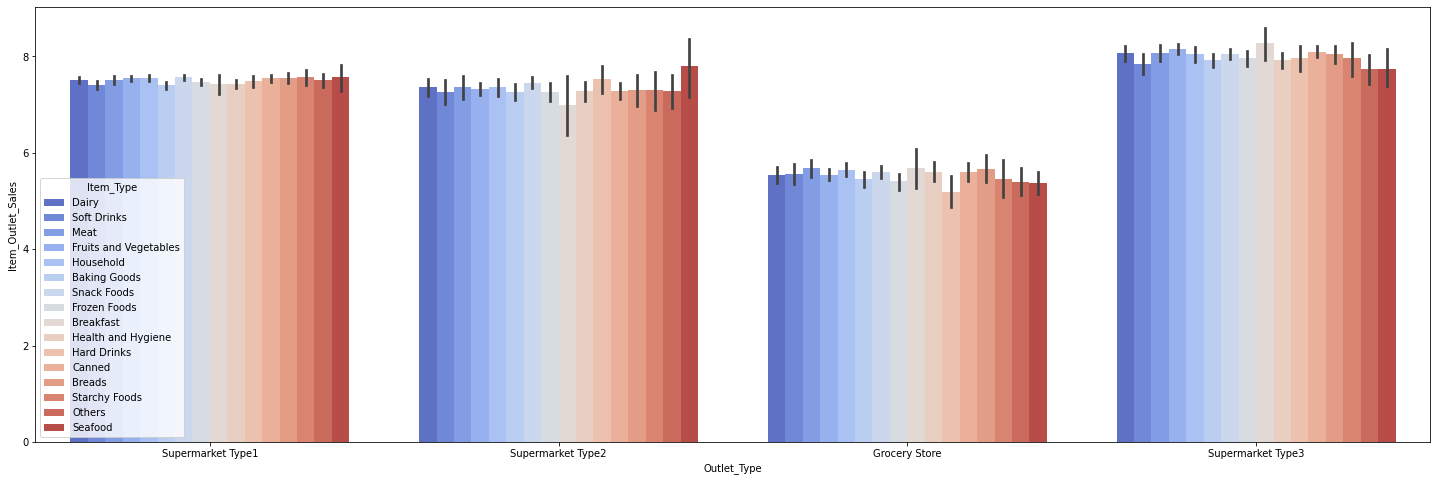

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Item_Type',data=df_train, palette='coolwarm')
plt.show()

**One Hot Encoding**

In [ ]:
df_train=pd.get_dummies(df_train,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df_test=pd.get_dummies(df_test,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])


In [ ]:
X = df_train.drop(columns=["Item_Outlet_Sales"])    
Y = df_train.Item_Outlet_Sales 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [ ]:
sc=StandardScaler()

In [ ]:
X_train_std=sc.fit_transform(X_train)

In [ ]:
X_test_std=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lc=LinearRegression()
lc.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
pred1=lc.predict(X_test_std)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rclf=RandomForestRegressor()
Rclf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
pred2=Rclf.predict(X_test)

In [ ]:
dc= DecisionTreeRegressor(max_depth=2)
dc.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
pred3=dc.predict(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gr= GradientBoostingRegressor(max_depth=2)
gr.fit(X_train,Y_train)

pred4=gr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(Y_test,pred1))
print(mean_absolute_error(Y_test,pred1))
print(mean_squared_error(Y_test,pred1))
print("\n")
print(r2_score(Y_test,pred2))
print(mean_absolute_error(Y_test,pred2))
print(mean_squared_error(Y_test,pred2))
print("\n")
print(r2_score(Y_test,pred3))
print(mean_absolute_error(Y_test,pred3))
print(mean_squared_error(Y_test,pred3))
print("\n")
print(r2_score(Y_test,pred4))
print(mean_absolute_error(Y_test,pred4))
print(mean_squared_error(Y_test,pred4))

0.715299634058234
0.41670556161788375
0.2933707441498407


0.6976967172118523
0.4337486697100229
0.31150974722891334


0.6143700573492525
0.4977014662922313
0.39737407034120537


0.7292448723932518
0.4065587115277913
0.2790008119786687
